<a href="https://colab.research.google.com/github/wazimikaito/Good-Lecture/blob/master/scipy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from scipy import signal as sig
sig.iirfilter(N = 2, Wn = [x/250, y/250], btype = 'bandpass', ftype= 'butter')
# Nは1, 2くらいでいいと思う．↑x, yには25が平均になるような値を入れる．

(array([ 3.73937863e-07,  0.00000000e+00, -1.49575145e-06,  0.00000000e+00,
         2.24362718e-06,  0.00000000e+00, -1.49575145e-06,  0.00000000e+00,
         3.73937863e-07]),
 array([  1.        ,  -7.48590133,  24.8850657 , -47.95006309,
         58.55540317, -46.40080436,  23.30299251,  -6.78350528,
          0.87689656]))

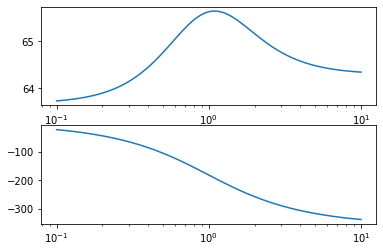

In [ ]:
from scipy import signal
import matplotlib.pyplot as plt
g = signal.lti([1, -3.73782659, 5.42284455, -3.60726556, 0.93138168], [0.00060985, 0, -0.00060985, 0, 0.00060985])

w, mag, phase = g.bode()

plt.subplot(2, 1, 1) # 2 行 1 列に並べたグラフの 1 つめ
plt.semilogx(w, mag) # 横軸対数でゲインをプロット


plt.subplot(2, 1, 2) # 2 行 1 列に並べたグラフの 2 つめ
plt.semilogx(w, phase) # 横軸対数で位相をプロット


plt.show() # colab では不要

In [ ]:
%%writefile bpf.py

y1, y2, y3, y4 = 0, 0, 0, 0
u1, u2, u3, u4 = 0, 0, 0, 0

def myfilter(u0):
    global u1, u2, u3, u4, y1, y2, y3, y4
    y0 = 3.73782659*y1 - 5.42284455*y2 + 3.60726556*y3 - 0.93138168*y4 + 0.00060985*u0 - 0.00121971*u2 + 0.00060985*u4
    u1, u2, u3, u4=u0, u1, u2, u3
    y1, y2, y3, y4=y0, y1, y2, y3
    return y0

try:
    while True:
        u = float(input())
        y = myfilter(u)
        print(u,y)
except:
    pass


Overwriting bpf.py


In [ ]:
!python3 bpf.py < u.txt

0.0 0.0
1.817068536 0.0011081392466796
3.246102262 0.006121667806142279
3.990478494 0.01708976247196934
3.914227561 0.03310685651338552
3.072372751 0.05023754340370525
1.69518077 0.0624308104460706
0.1304226279 0.06319901426812298
-1.242000802 0.0476214448658571
-2.102017963 0.014129150699125416
-2.265384297 -0.03443552092103827
-1.725234322 -0.09082214328737848
-0.6493078079 -0.14451539047632786
0.6660212945 -0.1838082622290152
1.873098044 -0.19835315716948138
2.662186543 -0.18160233508509868
2.840133161 -0.13255448794349267
2.378829414 -0.05637151442130057
1.421415458 0.03631510503105496
0.2447597908 0.13128669291711997
-0.8122992406 0.2134104813018696
-1.436881002 0.2695215791884824
-1.424007682 0.29088499078074787
-0.7318520808 0.27470980998888883
0.5038222224 0.2244115947572819
2.0 0.14861104342418197
3.394344267 0.05914649402260154
4.334115472 -0.031405295817871576
4.564152688 -0.11211255304052395
3.992081313 -0.17543983016268436
2.714412273 -0.21801143535823672
0.9967591922 -0.2

In [ ]:
%%writefile bpf.py
u1,u2,u3,u4,y1,y2,y3,y4=0,0,0,0,0,0,0,0 #初期化する
def myfilter(u0):
 global u1,u2,u3,u4,y1,y2,y3,y4 #グローバル変数(値を保持する変数)を定義
 y0=0.00060985*u0+-0.00121971*u2+0.00060985*u4+3.73782659*y1-5.42284455*y2+3.60726556*y3-0.93138168*y4 # この部分で差分方程式からy0 を求める。
 u1,u2,u3,u4=u0,u1,u2,u3 #過去のデータを代入u0→u1、u1→u2
 y1,y2,y3,y4=y0,y1,y2,y3
 return y0

try:
 while True:
   u = float(input())
   y = myfilter(u)
   print(u)
except: pass

Overwriting bpf.py
